In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('Data\housing_price_dataset.csv')
data2 = pd.read_csv('Data\Housing_Price_Data.csv')
data2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


C:\Users\zande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


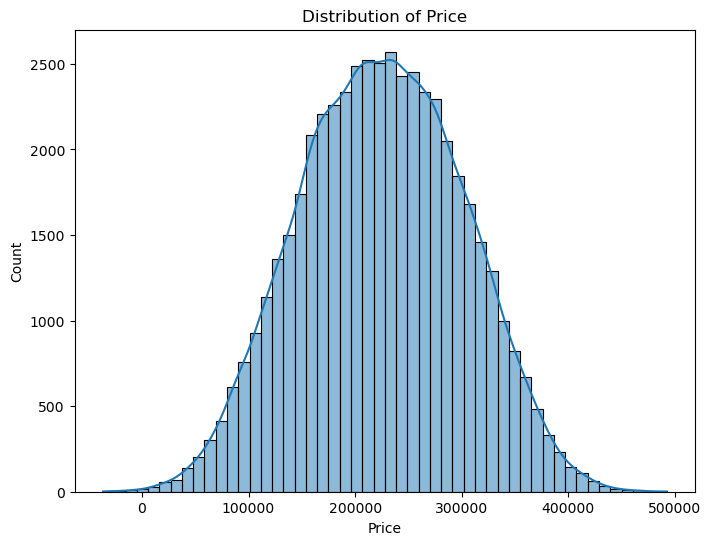

C:\Users\zande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


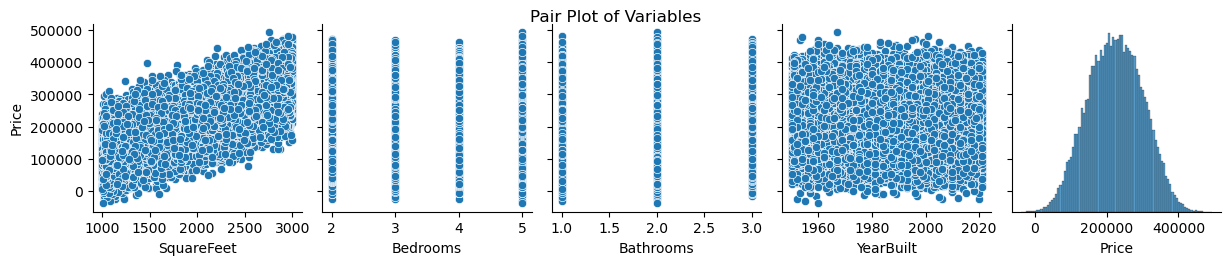

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()


sns.pairplot(data,y_vars='Price')
plt.suptitle('Pair Plot of Variables', y=1.02) # Adjust title position
plt.show()

C:\Users\zande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


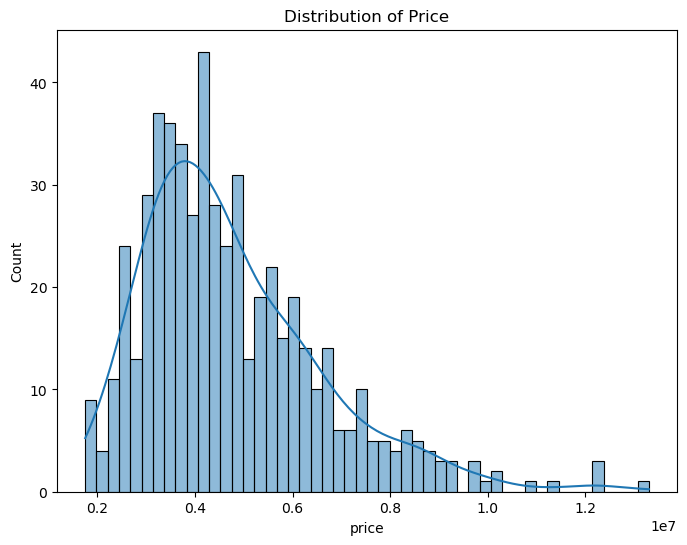

C:\Users\zande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


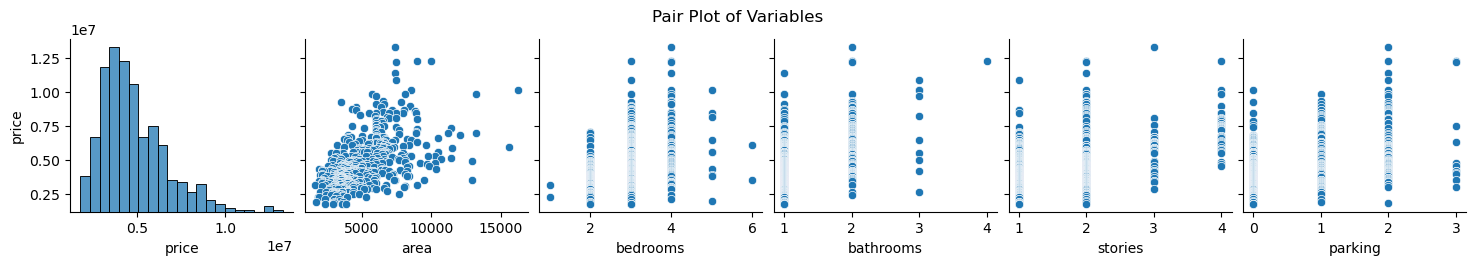

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(data2['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()


sns.pairplot(data2,y_vars='price')
plt.suptitle('Pair Plot of Variables', y=1.02) # Adjust title position
plt.show()

C:\Users\zande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


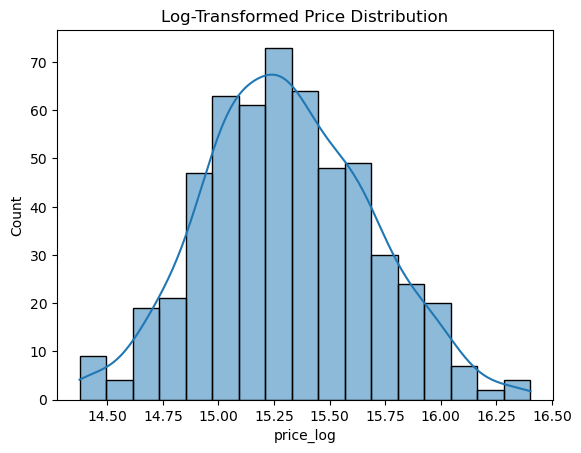

In [167]:
data2['price_log'] = np.log1p(data2['price'])

sns.histplot(data2['price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.show()

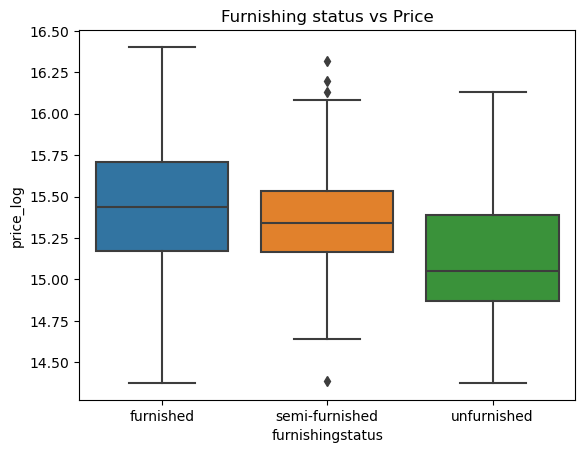

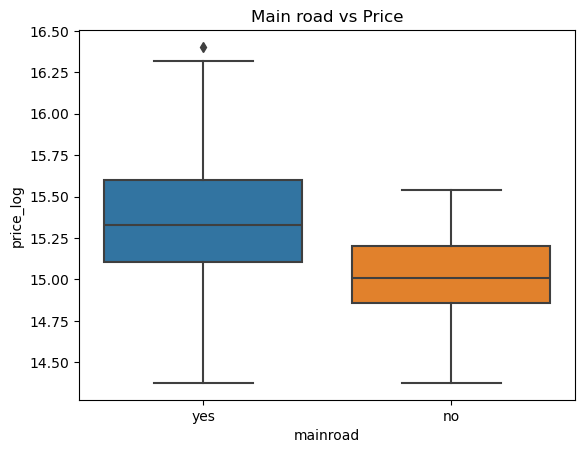

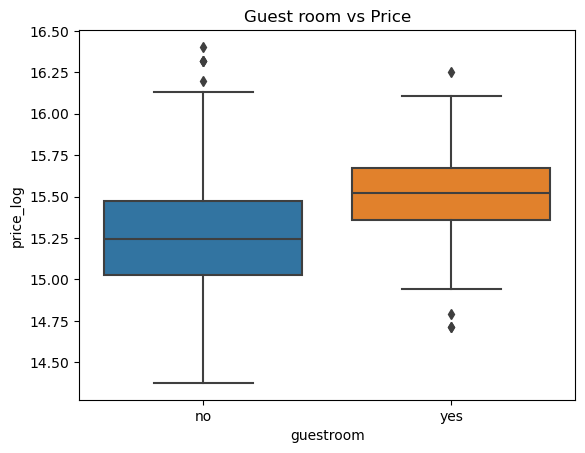

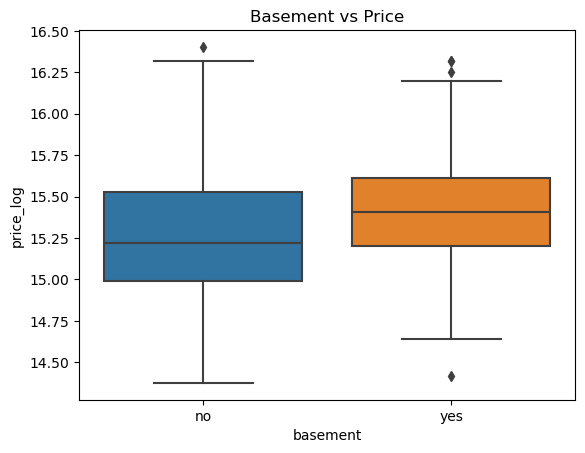

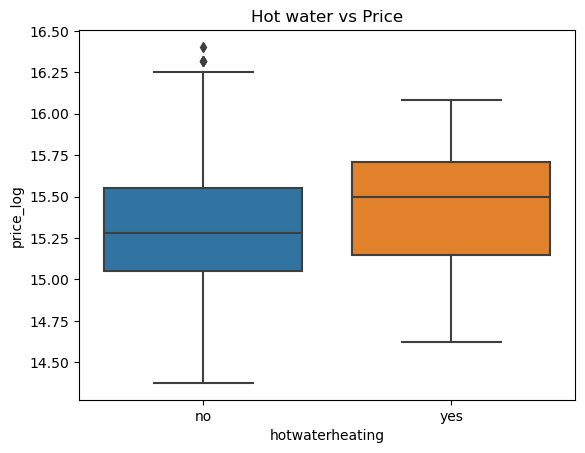

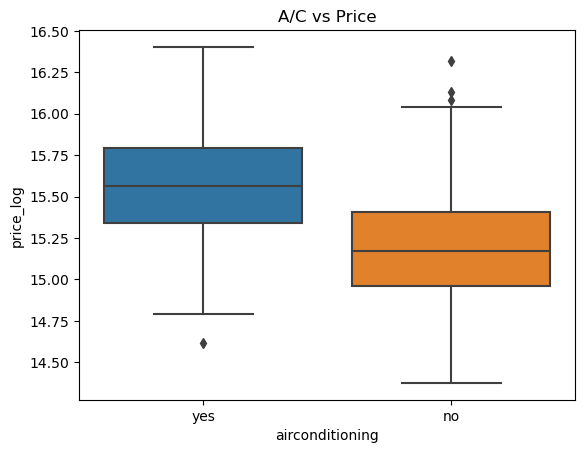

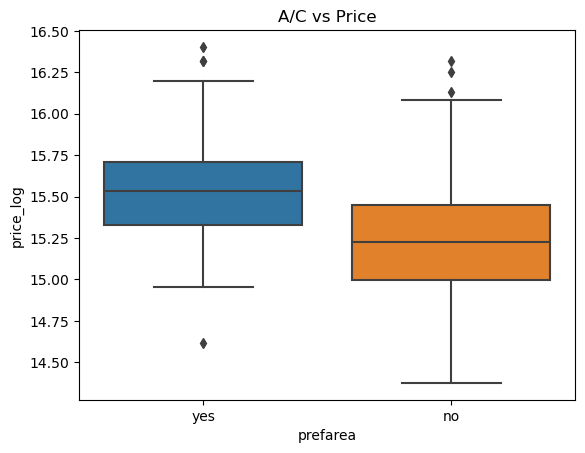

In [168]:
sns.boxplot(x='furnishingstatus', y='price_log', data=data2) # Overall quality
plt.title('Furnishing status vs Price')
plt.show()

sns.boxplot(x='mainroad', y='price_log', data=data2) # Overall quality
plt.title('Main road vs Price')
plt.show()

sns.boxplot(x='guestroom', y='price_log', data=data2) # Overall quality
plt.title('Guest room vs Price')
plt.show()

sns.boxplot(x='basement', y='price_log', data=data2) # Overall quality
plt.title('Basement vs Price')
plt.show()

sns.boxplot(x='hotwaterheating', y='price_log', data=data2) # Overall quality
plt.title('Hot water vs Price')
plt.show()

sns.boxplot(x='airconditioning', y='price_log', data=data2) # Overall quality
plt.title('A/C vs Price')
plt.show()

sns.boxplot(x='prefarea', y='price_log', data=data2) # Overall quality
plt.title('A/C vs Price')
plt.show()

In [ ]:
sns.boxplot(x='mainroad', y='price_log', data=data2) # Overall quality
plt.title('Furnishing status vs Price')
plt.show()

In [81]:
#Simple Data Prep

data_encoded = pd.get_dummies(data, columns=['Neighborhood'])

X = data_encoded[['SquareFeet', 'Bedrooms','Neighborhood_Suburb','Neighborhood_Urban','YearBuilt']]
y = data_encoded[['Price']]

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test,predictions)

r2

0.5750113277164458

In [ ]:
#Linear Regression simple
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test,predictions)

r2

In [169]:
#Better Data Prep

data_encoded2 = pd.get_dummies(data2,drop_first=True)
data_encoded2['mainroad_yes'] = data_encoded2['mainroad_yes'].replace({True: 1, False: 0})
data_encoded2['guestroom_yes'] = data_encoded2['guestroom_yes'].replace({True: 1, False: 0})
data_encoded2['basement_yes'] = data_encoded2['basement_yes'].replace({True: 1, False: 0})
data_encoded2['hotwaterheating_yes'] = data_encoded2['hotwaterheating_yes'].replace({True: 1, False: 0})
data_encoded2['airconditioning_yes'] = data_encoded2['airconditioning_yes'].replace({True: 1, False: 0})
data_encoded2['prefarea_yes'] = data_encoded2['prefarea_yes'].replace({True: 1, False: 0})
data_encoded2['furnishingstatus_unfurnished'] = data_encoded2['furnishingstatus_unfurnished'].replace({True: 1, False: 0})
data_encoded2['furnishingstatus_semi-furnished'] = data_encoded2['furnishingstatus_semi-furnished'].replace({True: 1, False: 0})
print(data_encoded2)

X = data_encoded2[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus_unfurnished','furnishingstatus_semi-furnished']]
y = data_encoded2[['price_log']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        price  area  bedrooms  bathrooms  stories  parking  price_log  \
0    13300000  7420         4          2        3        2  16.403275   
1    12250000  8960         4          4        4        3  16.321037   
2    12250000  9960         3          2        2        2  16.321037   
3    12215000  7500         4          2        2        3  16.318175   
4    11410000  7420         4          1        2        2  16.250001   
..        ...   ...       ...        ...      ...      ...        ...   
540   1820000  3000         2          1        1        2  14.414348   
541   1767150  2400         3          1        1        0  14.384879   
542   1750000  3620         2          1        1        0  14.375127   
543   1750000  2910         3          1        1        0  14.375127   
544   1750000  3850         3          1        2        0  14.375127   

     mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0               1              0             0      

In [178]:
#Linear Regression
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test,predictions)

n = len(y_test)
p = np.sum(model.coef_ != 0)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(r2)
print(adj_r2)

0.6722047416501402
0.6233841712576078


In [188]:
#lasso cv
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LassoCV(cv=5, n_jobs=-1) # n_jobs=-1 uses all available CPU cores
model.fit(X_train_scaled, y_train)
optimal_alpha = model.alpha_
print(f"The optimal alpha value is: {optimal_alpha}")
score = model.score(X_test_scaled, y_test)
print(f"R-squared score on test set: {score}")
print(f"Coefficients: {model.coef_}")

The optimal alpha value is: 0.0005070359574945511
R-squared score on test set: 0.6712071991152506
Coefficients: [ 1.05665214e-01  1.50368119e-02  8.90155409e-02  7.04370002e-02
  3.12505513e-02  3.88232459e-02  2.04866388e-02  4.71160720e-02
  2.79527439e-02  7.26118732e-02  4.39895726e-05  5.29381451e-02
 -5.08612378e-02  3.49872318e-05]


In [180]:
#Lasso regression 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test,y_pred)
print(f"Coefficients: {lasso_model.coef_}")

n = len(y_test)
p = np.sum(lasso_model.coef_ != 0)

adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(r2)
print(adj_r2)

Coefficients: [ 1.05543385e-01  1.49017156e-02  8.88850998e-02  7.01394156e-02
  3.10167693e-02  3.85859554e-02  2.03003181e-02  4.68073467e-02
  2.74434116e-02  7.24009881e-02  8.21988792e-05  5.26623755e-02
 -5.06629323e-02  0.00000000e+00]
0.6703571901828616
0.6252481741026216


In [182]:
# X_train_f = X_train[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus_unfurnished']]
# X_test_f = X_test[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','parking','prefarea_yes','furnishingstatus_unfurnished']]

# model = LinearRegression()

# model.fit(X_train_f, y_train)

# predictions = model.predict(X_test_f)

# r2 = r2_score(y_test,predictions)

# n = len(y_test)
# p = np.sum(model.coef_ != 0)

# adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# print(r2)
# print(adj_r2)

0.6720437938393007
0.6191476315553168
